In [1]:
import matplotlib.pyplot as plt

# Part 1
## Q5a

In [3]:
fpr = [0, 0.25, 0.5, 1]
tpr = [2/6, 4/6, 1, 1]

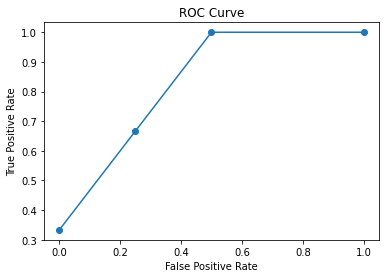

In [4]:
plt.plot(fpr, tpr, 'o-')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('1.5a.pdf')

# Part 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
def get_data(filename):
    fo = open(filename, 'r')
    datalines = fo.readlines()
    if filename[-1] == 't':
        x0 = []
        x1 = []
        y = []
        for data in datalines:
            f0, f1, l = map(float, data.strip().split(' '))
            x0.append(f0)
            x1.append(f1)
            y.append(int(l))
        return x0, x1, y
    elif filename[-1] == 'v':
        X = []
        y = []
        for data in datalines[1:]:
            datapoint = list(map(int, data.strip().split(',')[1:]))
            X.append(datapoint[:-1])
            y.append(datapoint[-1])
        return X, y

In [3]:
def fit_knn(k, X_train, y_train, X_test):
    y_pred = []
    for i in range(len(X_test)):
        distances = []
        for j in range(len(X_train)):
            distances.append((np.linalg.norm(X_test[i] - X_train[j]), y_train[j]))
        distances.sort()

        votes = [0, 0]
        for j in range(k):
            votes[distances[j][1]] += 1

        label = 0 if votes[0] >= votes[1] else 1
        y_pred.append(label)
    return y_pred

## Q1

In [4]:
x0_train, x1_train, y_train = get_data('D2z.txt')
X_train = np.column_stack((x0_train, x1_train))

x0_test = np.tile(np.arange(-2, 2.1, 0.1), 41)
x1_test = np.tile(np.arange(-2, 2.1, 0.1), (41,1)).transpose().reshape(1681)
X_test = np.column_stack((x0_test, x1_test))

In [5]:
y_pred = fit_knn(1, X_train, y_train, X_test)

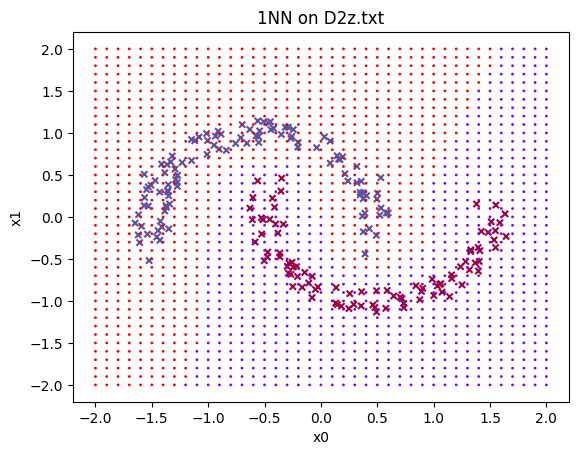

In [6]:
plt.scatter(x0_train, x1_train, c=y_train, s=20, cmap='Spectral', marker='x')
plt.scatter(x0_test, x1_test, s=1, c=y_pred, cmap='rainbow')
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('1NN on D2z.txt')
plt.savefig('2.1.pdf')

## Q2

In [11]:
X, y = get_data('emails.csv')

In [172]:
fold_ind = [0, 999, 1999, 2999, 3999, 4999]

for i in range(len(fold_ind)-1):
    X_test = np.array(X[fold_ind[i]:fold_ind[i+1]])
    y_test = np.array(y[fold_ind[i]:fold_ind[i+1]])

    X_train = np.array(X[:fold_ind[i]] + X[fold_ind[i+1]:])
    y_train = np.array(y[:fold_ind[i]] + y[fold_ind[i+1]:])
    
    y_pred = fit_knn(1, X_train, y_train, X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)

    print(i, acc, prec, rec)
    

0 0.8268268268268268 0.6581920903954802 0.8175438596491228
1 0.855 0.6876790830945558 0.8695652173913043
2 0.86 0.7217125382262997 0.8280701754385965
3 0.853 0.7220543806646526 0.8129251700680272
4 0.775 0.6062992125984252 0.7549019607843137


## Q3

In [26]:
X, y = get_data('emails.csv')
for i in range(len(X)):
    X[i] = np.array([1] + X[i])
X = np.array(X)
y = np.array(y)

In [8]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [9]:
def cost_function(X, y, theta):
    cost = 0
    for x, y_sample in zip(X,y):
        if y_sample == 1:
            cost -= np.log(sigmoid(np.dot(theta, x)))
        elif y_sample == 0:
            cost -= np.log(1-sigmoid(np.dot(theta, x)))
    cost /= len(X)
    return cost

In [10]:
def gradient(X, y, theta):
    grad = np.zeros(len(X[0]))
    res = y - sigmoid(np.matmul(theta, np.transpose(X)))
    res = np.matmul(res, X)
    grad -= res
    grad /= len(X)
    return grad

In [11]:
def acc_score(X, y, theta):
    thres = 0.5
    y_pred = sigmoid(np.matmul(theta, np.transpose(X))) > thres
    acc = np.sum(y == y_pred)/len(X)
    return acc

In [71]:
def fit_lr(X, y, lr, acc_target, logs=True):
    np.random.seed(7)
    theta_t = np.random.random(len(X[0]))
    sanity = 1e5
    while acc_score(X, y, theta_t) < acc_target and sanity > 0:
        theta_t_1 = theta_t - lr*gradient(X, y, theta_t)
        theta_t = theta_t_1
        if logs and (sanity%1000) == 0:
            print("Accuracy:", acc_score(X, y, theta_t))
        sanity -= 1
    return theta_t

In [58]:
theta = fit_lr(X, y, 0.003, 0.9)

Accuracy: 0.2892


/var/folders/q2/0chf7k2549qcg23qshg7bps80000gp/T/ipykernel_31104/1844366379.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


Accuracy: 0.4864
Accuracy: 0.534
Accuracy: 0.5476
Accuracy: 0.5644
Accuracy: 0.5714
Accuracy: 0.5804
Accuracy: 0.5878
Accuracy: 0.605
Accuracy: 0.6134
Accuracy: 0.623
Accuracy: 0.634
Accuracy: 0.6414
Accuracy: 0.649
Accuracy: 0.6538
Accuracy: 0.6568
Accuracy: 0.661
Accuracy: 0.6668
Accuracy: 0.674
Accuracy: 0.677
Accuracy: 0.6794
Accuracy: 0.681
Accuracy: 0.6834
Accuracy: 0.6862
Accuracy: 0.6882
Accuracy: 0.691
Accuracy: 0.6932
Accuracy: 0.6962
Accuracy: 0.6988
Accuracy: 0.7004
Accuracy: 0.7026
Accuracy: 0.706
Accuracy: 0.707
Accuracy: 0.7086
Accuracy: 0.71
Accuracy: 0.7124
Accuracy: 0.715
Accuracy: 0.7152
Accuracy: 0.7168
Accuracy: 0.7186
Accuracy: 0.72
Accuracy: 0.72
Accuracy: 0.7214
Accuracy: 0.7226
Accuracy: 0.7244
Accuracy: 0.7254
Accuracy: 0.726
Accuracy: 0.7264
Accuracy: 0.7272
Accuracy: 0.7282
Accuracy: 0.7302
Accuracy: 0.7308
Accuracy: 0.7326
Accuracy: 0.7332
Accuracy: 0.734
Accuracy: 0.7344
Accuracy: 0.7358
Accuracy: 0.7362
Accuracy: 0.7366
Accuracy: 0.7376
Accuracy: 0.7384
A

Accuracy: 0.8628
Accuracy: 0.8634
Accuracy: 0.8636
Accuracy: 0.864
Accuracy: 0.864
Accuracy: 0.8646
Accuracy: 0.8644
Accuracy: 0.864
Accuracy: 0.8638
Accuracy: 0.864
Accuracy: 0.864
Accuracy: 0.864
Accuracy: 0.8638
Accuracy: 0.8652
Accuracy: 0.865
Accuracy: 0.8632
Accuracy: 0.8642
Accuracy: 0.8656
Accuracy: 0.8656
Accuracy: 0.8654
Accuracy: 0.8652
Accuracy: 0.8648
Accuracy: 0.8646
Accuracy: 0.8646
Accuracy: 0.8648
Accuracy: 0.8658
Accuracy: 0.8648
Accuracy: 0.865
Accuracy: 0.8654
Accuracy: 0.8658
Accuracy: 0.8658
Accuracy: 0.8654
Accuracy: 0.865
Accuracy: 0.8652
Accuracy: 0.866
Accuracy: 0.866
Accuracy: 0.8656
Accuracy: 0.8656
Accuracy: 0.866
Accuracy: 0.8654
Accuracy: 0.8662
Accuracy: 0.8658
Accuracy: 0.8658
Accuracy: 0.8668
Accuracy: 0.8634
Accuracy: 0.864
Accuracy: 0.8664
Accuracy: 0.8672
Accuracy: 0.8674
Accuracy: 0.8674
Accuracy: 0.8674
Accuracy: 0.8674
Accuracy: 0.8676
Accuracy: 0.8674
Accuracy: 0.8664
Accuracy: 0.8664
Accuracy: 0.8666
Accuracy: 0.8668
Accuracy: 0.8668
Accuracy: 

Accuracy: 0.894
Accuracy: 0.8944
Accuracy: 0.8944
Accuracy: 0.8948
Accuracy: 0.895
Accuracy: 0.8952
Accuracy: 0.8938
Accuracy: 0.8924
Accuracy: 0.89
Accuracy: 0.8916
Accuracy: 0.8918
Accuracy: 0.8924
Accuracy: 0.8938
Accuracy: 0.8952
Accuracy: 0.8958
Accuracy: 0.895
Accuracy: 0.8948
Accuracy: 0.895
Accuracy: 0.8952
Accuracy: 0.8954
Accuracy: 0.8956
Accuracy: 0.895
Accuracy: 0.895
Accuracy: 0.8954
Accuracy: 0.8952
Accuracy: 0.8952
Accuracy: 0.8936
Accuracy: 0.8908
Accuracy: 0.8908
Accuracy: 0.8932
Accuracy: 0.8936
Accuracy: 0.8938
Accuracy: 0.8948
Accuracy: 0.8958
Accuracy: 0.8966
Accuracy: 0.8964
Accuracy: 0.8964
Accuracy: 0.8964
Accuracy: 0.8962
Accuracy: 0.896
Accuracy: 0.896
Accuracy: 0.8958
Accuracy: 0.8956
Accuracy: 0.8954
Accuracy: 0.8956
Accuracy: 0.8954
Accuracy: 0.8918
Accuracy: 0.8922
Accuracy: 0.8938
Accuracy: 0.8942
Accuracy: 0.8946
Accuracy: 0.8956
Accuracy: 0.8964
Accuracy: 0.8966
Accuracy: 0.8966
Accuracy: 0.8966
Accuracy: 0.8966
Accuracy: 0.8966
Accuracy: 0.8962
Accurac

In [13]:
theta = fit_lr(X, y, 0.1, 0.95)

C:\Users\Ayushi\AppData\Local\Temp\ipykernel_9908\1844366379.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


Accuracy: 0.7108
Accuracy: 0.2892
Accuracy: 0.7952
Accuracy: 0.289
Accuracy: 0.8044
Accuracy: 0.8032
Accuracy: 0.7236
Accuracy: 0.7116
Accuracy: 0.7432
Accuracy: 0.7164
Accuracy: 0.7408
Accuracy: 0.7302
Accuracy: 0.7424
Accuracy: 0.749
Accuracy: 0.7558
Accuracy: 0.7736
Accuracy: 0.7818
Accuracy: 0.7838
Accuracy: 0.7802
Accuracy: 0.7812
Accuracy: 0.7816
Accuracy: 0.79
Accuracy: 0.7958
Accuracy: 0.8084
Accuracy: 0.8298
Accuracy: 0.832
Accuracy: 0.8324
Accuracy: 0.7518
Accuracy: 0.7572
Accuracy: 0.7702
Accuracy: 0.8
Accuracy: 0.8214
Accuracy: 0.846
Accuracy: 0.8478
Accuracy: 0.8476
Accuracy: 0.84
Accuracy: 0.7574
Accuracy: 0.7674
Accuracy: 0.787
Accuracy: 0.808
Accuracy: 0.817
Accuracy: 0.8168
Accuracy: 0.8194
Accuracy: 0.8178
Accuracy: 0.8136
Accuracy: 0.806
Accuracy: 0.8074
Accuracy: 0.8214
Accuracy: 0.86
Accuracy: 0.8606
Accuracy: 0.8626
Accuracy: 0.8644
Accuracy: 0.8512
Accuracy: 0.746
Accuracy: 0.765
Accuracy: 0.7956
Accuracy: 0.8186
Accuracy: 0.848
Accuracy: 0.8672
Accuracy: 0.8714


In [72]:
X, y = get_data('emails.csv')
fold_ind = [0, 999, 1999, 2999, 3999, 4999]
scores = []
for i in range(len(fold_ind)-1):
    print('Running fold', i, '...')
    X_test = np.array(X[fold_ind[i]:fold_ind[i+1]])
    y_test = np.array(y[fold_ind[i]:fold_ind[i+1]])

    X_train = np.array(X[:fold_ind[i]] + X[fold_ind[i+1]:])
    y_train = np.array(y[:fold_ind[i]] + y[fold_ind[i+1]:])
    
    weights = fit_lr(X_train, y_train, 1, 0.9)
    y_pred = sigmoid(np.matmul(weights, np.transpose(X_test))) > 0.5
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    scores.append([acc, prec, rec])
    print(acc, prec, rec)

Running fold 0 ...


C:\Users\Ayushi\AppData\Local\Temp\ipykernel_9908\1844366379.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


Accuracy: 0.709822544363909
0.9109109109109109 0.8712121212121212 0.8070175438596491
Running fold 1 ...


C:\Users\Ayushi\AppData\Local\Temp\ipykernel_9908\1844366379.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


Accuracy: 0.7075
0.896 0.8282442748091603 0.7862318840579711
Running fold 2 ...


C:\Users\Ayushi\AppData\Local\Temp\ipykernel_9908\1844366379.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


Accuracy: 0.70975
Accuracy: 0.88875
0.895 0.835820895522388 0.7859649122807018
Running fold 3 ...


C:\Users\Ayushi\AppData\Local\Temp\ipykernel_9908\1844366379.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


Accuracy: 0.712
0.88 0.8222222222222222 0.7551020408163265
Running fold 4 ...


C:\Users\Ayushi\AppData\Local\Temp\ipykernel_9908\1844366379.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


Accuracy: 0.715
0.851 0.7262247838616714 0.8235294117647058


## Q4

In [17]:
X, y = get_data('emails.csv')

In [18]:
k_values = [1, 3, 5, 7, 10]

fold_ind = [0, 999, 1999, 2999, 3999, 4999]

avg_accuracies = []

for k_val in k_values:
    avg_acc = 0
    for i in range(len(fold_ind)-1):
        X_test = np.array(X[fold_ind[i]:fold_ind[i+1]])
        y_test = np.array(y[fold_ind[i]:fold_ind[i+1]])

        X_train = np.array(X[:fold_ind[i]] + X[fold_ind[i+1]:])
        y_train = np.array(y[:fold_ind[i]] + y[fold_ind[i+1]:])

        y_pred = fit_knn(k_val, X_train, y_train, X_test)
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        
        avg_acc += acc

        print(i, acc, prec, rec)
    avg_acc /= 5
    avg_accuracies.append(avg_acc)
    
for i in range(len(k_values)):
    print(f"Average accuracy for k = {k_values[i]}: {avg_accuracies[i]}")

0 0.8268268268268268 0.6581920903954802 0.8175438596491228
1 0.855 0.6876790830945558 0.8695652173913043
2 0.86 0.7217125382262997 0.8280701754385965
3 0.853 0.7220543806646526 0.8129251700680272
4 0.775 0.6062992125984252 0.7549019607843137
0 0.8468468468468469 0.6823204419889503 0.8666666666666667
1 0.852 0.6975308641975309 0.8188405797101449
2 0.855 0.7215189873417721 0.8
3 0.88 0.7788461538461539 0.826530612244898
4 0.774 0.6092896174863388 0.7287581699346405
0 0.8388388388388388 0.6722222222222223 0.8491228070175438
1 0.851 0.7068403908794788 0.7862318840579711
2 0.868 0.7508196721311475 0.8035087719298246
3 0.871 0.7669902912621359 0.8061224489795918
4 0.78 0.6155913978494624 0.7483660130718954
0 0.8388388388388388 0.6722222222222223 0.8491228070175438
1 0.862 0.7211538461538461 0.8152173913043478
2 0.874 0.7572815533980582 0.8210526315789474
3 0.875 0.7807308970099668 0.7993197278911565
4 0.78 0.6162162162162163 0.7450980392156863
0 0.8658658658658659 0.7427652733118971 0.810526

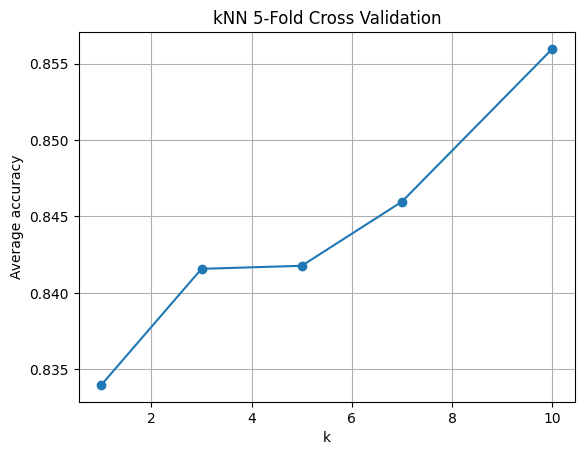

In [77]:
plt.plot(k_values, avg_accuracies, 'o-')
plt.grid(True)
plt.title("kNN 5-Fold Cross Validation")
plt.xlabel('k')
plt.ylabel('Average accuracy')
plt.savefig('2.4.pdf')

## Q5

In [79]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve

In [80]:
X, y = get_data('emails.csv')
for i in range(len(X)):
    X[i] = np.array([1] + X[i])
X = np.array(X)
y = np.array(y)

In [81]:
X_train = X[:4000]
X_test = X[4000:]

y_train = y[:4000]
y_test = y[4000:]

In [82]:
y_pred_knn = fit_knn(5, X_train, y_train, X_test)

In [83]:
weights = fit_lr(X_train, y_train, 1, 0.9)
y_pred_lr = sigmoid(np.matmul(weights, np.transpose(X_test))) > 0.5

C:\Users\Ayushi\AppData\Local\Temp\ipykernel_9908\1844366379.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


Accuracy: 0.715


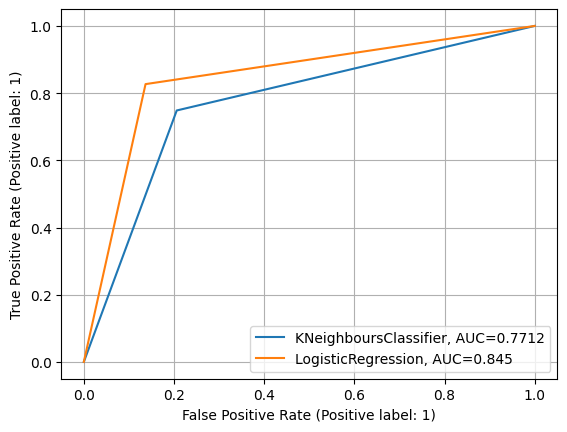

In [86]:
fpr, tpr, _ = roc_curve(y_test, y_pred_knn)
auc = round(roc_auc_score(y_test, y_pred_knn), 4)
plt.plot(fpr,tpr,label="KNeighboursClassifier, AUC="+str(auc))

fpr, tpr, _ = roc_curve(y_test, y_pred_lr)
auc = round(roc_auc_score(y_test, y_pred_lr), 4)
plt.plot(fpr,tpr,label="LogisticRegression, AUC="+str(auc))

plt.xlabel('False Positive Rate (Positive label: 1)')
plt.ylabel('True Positive Rate (Positive label: 1)')
plt.grid(True)
plt.legend()
plt.show()
plt.savefig('2.5.pdf')